Notebook is copyright &copy; of <a href="https://ajaytech.co"/> Ajay Tech </a>

# Logistic Regression

## Contents

- What is Logistic Regression
- Math
  - logit function
  - sigmoid function
- Implementation
  - Dataset
  - Modeling
  - Visualization
  - Basic Evaluation
- Optimization
- Evaluation
  - ROC Curve
  - Area under ROC Curve
- References

### What is Logistic Regression

Logistic regression is a type of linear regression. However, it is used for classification only. Huh.. that's confusing, right ? Let's dive in. 

Let's take the simple iris dataset. The target variable as you know by now ( from day 9 - <a href="https://ajaytech.co/introduction-to-classification-in-python">Introduction to Classification in Python</a>, where we discussed classification using K Nearest neighbours ) is categorical in nature. Let's load the data first.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

iris_data = iris.data

In [5]:
iris_data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

And the target of course is the _species_. 

In [6]:
iris_target = iris.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's simplify the dataset to just 2 species - 

- 0 - setosa
- 1 - versi-color

Let's just take data for 2 of the species ( say setosa and versi-color ) with just the sepal data ( sepal length and sepal width ) and plot it.

In [7]:
iris_data   = iris_data[0:100]
iris_target = iris_target[0:100] 

Text(0, 0.5, 'Sepal Width')

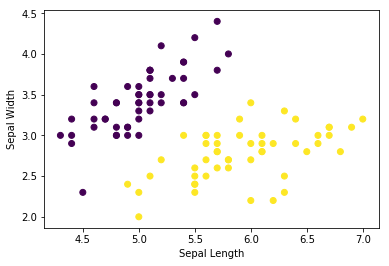

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(iris_data[:,0],iris_data[:,1], c=iris_target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Let's simplify this further - say, we wanted to predict the species based on a single parameter - **Sepal Length**. Let's first plot it.

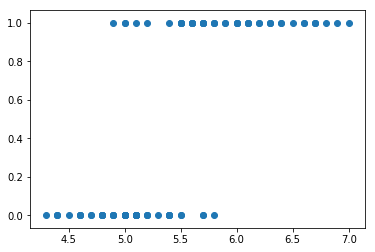

In [9]:
plt.scatter(iris_data[:,0], iris_target)
plt.savefig("iris_target.png")

We know that regression is used to predict a continous variable. What about a categorical variable like this ? (species). If we can draw a curve like this,

<img src="./pics/logit_function.jpg"/>

and for all target values predicted with value > 0.5 put it in one category, and for all target values less than 0.5, put it in the other category - like this.

<img src="./pics/setosa-vs-virginica.jpg"/>

A linear regression (multilinear in this case) equation looks like this.

# $y = m + a_1 X_1 + a_2 X_2 + a_3 X_3 .. $

Logistic regression is almost similar to linear regression. The difference lies in how the predictor is calculated. Let's see it in the next section.

### Math

The name logistic regression is derived from the **logit** function. This function is based on odds. 

#### logit function

Let's take an example. A standard dice roll has 6 outcomes. So, what is the probability of landing a 4 ?

# $P_4 = \frac{Specific ~ Outcome} {Total ~ Number ~ of ~ Outcomes} =  \frac {1}{6}$

Now, what about odds ? The odds of landing a 4 is

# $Odds_4 = \frac{Probability ~ of ~ 4}{Probability ~ of ~ Everything ~ but ~ 4} = \frac{P_4}{1-P_4}$

$ where \hspace{0.5cm} P_4 = \frac {1}{6} $

So, when we substitute p into the odds equation, it becomes

# $ odds = \frac {\frac{1}{6}}{(1-\frac{1}{6})} = \frac{1}{5} = 0.2 $

OK. Now that we understand **Probability** and **Odds**, let's get to the **log** of odds. 

# $ log (odds ) = log ( \frac{P}{1-P}) $

How exactly is the logistic regression similar to linear regression ? Like so.

# $log ( \frac{P}{1-P}) = m + a_1 X_1 + a_2 X_2 + a_3 X_3 .. $

Where the predictor ( log of odds ) varies between ( -&infin; to +&infin; ). 

To understand this better, let's plot the log of odds between a probabilty value of 0 and 1. 

In [10]:
import numpy as np

x = np.linspace (0, 0.999, num=100)
y = np.log (x/(1-x) )

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


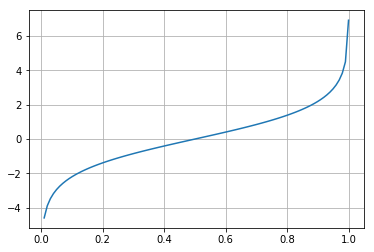

In [11]:
plt.plot(x,y)
plt.grid()

This is the logistic regression curve. It maps a probability value ( 0 to 1 ) to a number ( -&infin; to +&infin; ).  However, we are not looking for a continous variable, right ? The predictor we are looking for is a categorical variable - in our case, we said we would be able to predict this based on probability. 

- p >= 0.5 - Category 1
- p < 0.5  - Category 2

In order to calculate those probabilities, we would have to calculate the inverse function of the **logit** function. 

#### sigmoid function

The inverse of the logit curve is the *inverse-logit* or **sigmoid** function ( or **expit** function as sklearn calls it). The **sigmoid** function transforms the numbers ( -&infin; to +&infin; ) back to values between 0 and 1. Here is the formula for the **sigmoid** function.

# $sigmoid_x = \frac{1}{1+e^{\text{-x}}}$

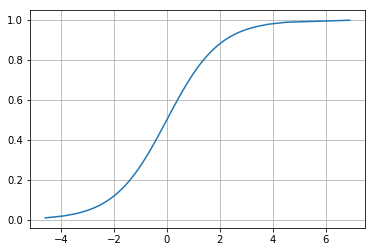

In [12]:
from scipy.special import expit

x_new = y
y_new = expit (x_new)

plt.plot(x_new,y_new)
plt.grid()

Essentially, if we flip the logit function 90<sup>0</sup>, you get the sigmoid function.

<img src="./pics/logit.png"/> <img src="./pics/sigmoid.png"/>

> Here is the trick - As long as we are able to find a curve like the one below, although the target (predictor) is a value between 0 and 1 ( probabilities), we can say that all values below 0.5 ( half way mark ) belongs to one category and the remaining ( values above 0.5 ) belong to the next category. This is the essence of logistic regression. 

<img src="./pics/setosa-vs-virginica.jpg"/>

### Implementation

Let's try to implement the logistic regression function in Python step by step. 

#### Data & Modeling

Just to keep the same example going, let's try to fit the sepal length data to try and predict the species as either _Setosa_ or _Versicolor_.

In [13]:
from sklearn import linear_model
from scipy.special import expit

model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:,0].reshape(-1,1), iris_target)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Let's plot the data set first ( like we have already done before ). 

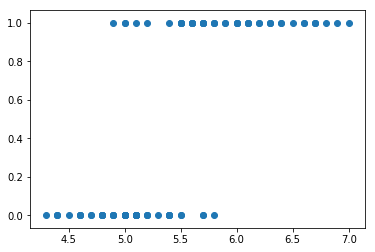

In [14]:
plt.scatter(iris_data[:,0],iris_target)

**Question** - For the data above, which of the following techniques is a better fit ?

#### Visualization

Now, let's plot the linear equation (sigmoid curve actually) and see the fit visually. Let's create dummy x axis data. The values range between 4.0 and 7.0.

In [15]:
x_test = np.linspace(4.0,7.0,100)
# predict dummy y_test data based on the logistic model
y_test = x_test * model.coef_ + model.intercept_

sigmoid = expit(y_test)

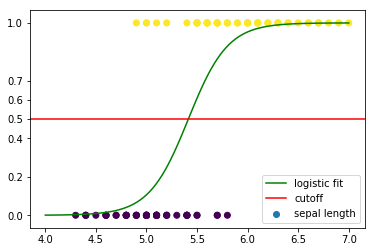

In [16]:
plt.scatter(iris_data[:,0],iris_target, c=iris_target,label = "sepal length")

# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")

#### Evaluation

Let's split up the data into training and test data and model it. As usual, to evaluate categorical target data, we use a confusion matrix. 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (iris_data[:,0], iris_target)

In [18]:
from sklearn import linear_model

model = linear_model.LogisticRegression().fit(X_train.reshape(-1,1), y_train)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
y_predict = model.predict(X_test.reshape(-1,1))

As usual, to evaluate categorical target data, we use a confusion matrix. 

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( "confusion matrix = \n" , confusion_matrix(y_test, y_predict) )
print ( "accuracy score = ",accuracy_score(y_test,y_predict) )

# or use the score function of LogisticRegression class 
# model.score(X_test.reshape(-1,1),y_test)

confusion matrix = 
 [[ 6  9]
 [ 0 10]]
accuracy score =  0.64


That's a 84% score. Pretty decent, given the fact that we are just using 1 parameter - Sepal length. We are ofcourse not restricted to just 1 predictor - We can use all of the predictors available ( Sepal Length/Width , Petal Length/Width ). Let's follow our standard train/test split process and try to predict the accuracy.

In [21]:
X_train, X_test, y_train, y_test = train_test_split (iris_data[:,0].reshape(-1,1), iris_target)

In [22]:
from sklearn import linear_model
from scipy.special import expit

model = linear_model.LogisticRegression().fit(X_train, y_train)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
y_predict = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( confusion_matrix(y_test, y_predict) )
print ( accuracy_score(y_test,y_predict) )

[[11  1]
 [ 1 12]]
0.92


### Optimization

Let's plot the logistic regression curve for the test data set.

Text(5.5, 0.05, '<--False Positive-->')

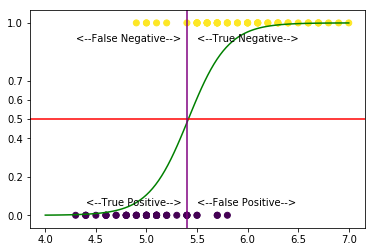

In [25]:
# 1. Plot the Species on y-axis and Sepal Length on x-axis
plt.scatter(iris_data[:,0],iris_target, c=iris_target,label = "sepal length")

# 2. Plot the logistic regression curve based on the sigmoid function
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
# plt.scatter(X_test[:,0],probabilities)

plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])

# Draw a horizontal line (in red) indicating the threshold (cutoff) probability
plt.axhline(.5, color="red", label="cutoff")

# Draw a vertical line (in purple) indicating the threshold (cutoff) sepal length
plt.axvline(5.4, color="purple", label="")

# Use text to show the Negative and positive values
plt.text(5.50,0.9,"<--True Negative-->")
plt.text(4.3,0.9,"<--False Negative-->")
plt.text(4.4,0.05,"<--True Positive-->")
plt.text(5.5,0.05,"<--False Positive-->")

As you can see, still there are quite a bit of mis-classifications. All the **false negatives** and **false positives** in the plot above are examples of mis-classification. Irrespective of the algorithm used to calculate the fit, there is only so much that can be done in increasing the classification accuracy given the data as-is. 

However, there is a specific optimization that can be done - and that is to specifically increase accuracy of one segment of the confusion matrix at the expense of the other segments. For example, if you look at a visual of the confusion matrix for our dataset.

<img src="./pics/confusion-matrix-visual.png"/>

For this dataset, classifying the species as "setosa" is positive and "versi-color" as negative

- setosa - positive
- versi-color - negative

Let's actuall calculate the accuracy values.

In [26]:
cm = confusion_matrix(y_test, y_predict)
print ( cm )

[[11  1]
 [ 1 12]]


In [27]:
tp = float(cm[0,0]) / float(cm[0,0] + cm[1,0])
fp = float(cm[1,0]) / float(cm[0,0] + cm[1,0])
tn = float(cm[0,1]) / float(cm[0,1] + cm[1,1])
fn = float(cm[1,1]) / float(cm[1,1] + cm[0,1])

print ("True Positive = ", tp)
print ("False Positive = ", fp)
print ("True Negative = ", tn)
print ("False Negative = ", fn)

True Positive =  0.9166666666666666
False Positive =  0.08333333333333333
True Negative =  0.07692307692307693
False Negative =  0.9230769230769231


<img src="./pics/confusion-matrix-probabilities.png"/>

What if we want to predict 100% of setosa ( or a much more accurate classification than 0.9 ). Of course, like we discussed earlier, it will come at a cost. However, there is a usecase for this scenario. For example, if getting a particular classification right is extremely important, then we focus more on that particular classification than the others. Have you seen the Brad Pitt's movie "World War Z" ? A plague emerges all around the world and an asylum is set up in Israel with a high wall. However, when you enter the wall, they make absolutely sure that you do not have the plague. Say, if you have the plague and if you call that as positive, then essentially you maximize the green box in the picture above.

Or another example would be, if you were to diagonize cancer patients, you would rather want to increase the odds of predicting a cancer patient if he/she really has it (True positive). Even it it comes at a cost of wrongly classifying a non-cancer patient as positive ( false positive ). The former can save a life while the later will just cost the company a patient. 

Unfortunately, there is no such parameter that we can pass to the **LogisticRegression** object. However, it does help us with the probabilities that is has predicted.

In [28]:
p = model.predict_proba(X_test[:,0].reshape(-1,1))
p = p[:,1]

Once we have the probabilities, we can set a new threshold and say that all values above a particular probability value be set to 1 and all others (below that value) be set to 0. 

In [29]:
from sklearn.preprocessing import Binarizer

b = Binarizer(0.47)
new_classification = b.fit_transform(p.reshape(-1,1))

Here is the old confusion matrix. 

In [30]:
cm = confusion_matrix(y_test, y_predict)
print ( cm )

tp = float(cm[0,0]) / float(cm[0,0] + cm[1,0])
fp = float(cm[1,0]) / float(cm[0,0] + cm[1,0])
tn = float(cm[0,1]) / float(cm[0,1] + cm[1,1])
fn = float(cm[1,1]) / float(cm[1,1] + cm[0,1])

print ("True Positive = ", tp)
print ("False Positive = ", fp)
print ("True Negative = ", tn)
print ("False Negative = ", fn)

[[11  1]
 [ 1 12]]
True Positive =  0.9166666666666666
False Positive =  0.08333333333333333
True Negative =  0.07692307692307693
False Negative =  0.9230769230769231


And here is the new confusion matrix with the transformed threshold values.

In [31]:
new_cm = confusion_matrix(y_test, new_classification)
print ( new_cm )
cm = new_cm 

tp = float(cm[0,0]) / float(cm[0,0] + cm[1,0])
fp = float(cm[1,0]) / float(cm[0,0] + cm[1,0])
tn = float(cm[0,1]) / float(cm[0,1] + cm[1,1])
fn = float(cm[1,1]) / float(cm[1,1] + cm[0,1])

print ("True Positive = ", tp)
print ("False Positive = ", fp)
print ("True Negative = ", tn)
print ("False Negative = ", fn)

[[ 5  7]
 [ 0 13]]
True Positive =  1.0
False Positive =  0.0
True Negative =  0.35
False Negative =  0.65


<img src="./pics/confusion_matrix_after_new_threshold.png"/>

We are able to increase the "setosa" species much more predictably. Of course, the threshold value for cut-off should have to be decided in a much more robust way ( after a bit of trail and error ) based on many more sets of training/test sets rather than just one. You should be able to do it using a wrapper program that repeatedly does the split, modeling and optimization until you find the best threshold that most accurately predicts the true positive.

### Evaluation

#### ROC Curve

Receiver Operating Characteristics - also called ROC Curve is a measure of how good the classification is. Scikit Learn has an easy way to create ROC curve and calculate the area under the ROC curve. First off, let's start with a classifier like Logistic Regression and let it predict all the probabilities (thresholds). 

**Step 1** - Get the data

In [12]:
from sklearn import datasets

iris = datasets.load_iris()

# Get only the setosa and versicolor data
iris_data = iris.data[0:100,:]
iris_target = iris.target[0:100]

**Step 2** - Model the data using a classifier

In [32]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (iris_data[:,0], iris_target)

# Model the data using Logistic Regression
from sklearn import linear_model

model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:,0].reshape(-1,1), iris_target)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

**Step 3** - Use *roc_curve* function to create the True Positive Rate and False positive Rate.

In [15]:
from sklearn.metrics import roc_curve, auc

probabilities = model.predict_proba(X_test.reshape(-1,1))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

**Step 4** - Plot the ROC curve

Text(0.3, 0.8, 'ROC Curve')

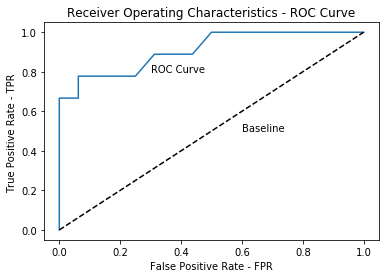

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")

plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR ")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6,0.5,"Baseline")
plt.text(0.3,0.8,"ROC Curve")

**Step 5** - Calculate _Area under the Curve_

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, probabilities)

0.9097222222222223

### Reference

- <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression"> Scikit Learn Implementation details of Logistic Regression </a>

- <a href="https://ajaytech.co/roc-curve"> ROC Curve </a>